# Regressão 01 - tarefa 03 - transformações em X e Y


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
#Importando as Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")


import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices, dmatrix
from scipy import stats

In [23]:
# Carrega a base tips
tips = sns.load_dataset("tips")

In [24]:
# Criação das variáveis
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips["diner"] = (tips["time"] == "Dinner").astype(int)

In [25]:
# Criação da matriz de design
formula_tip = "tip ~ C(sex) + C(smoker) + C(diner) + net_bill"
y, X = dmatrices(formula_tip, data=tips, return_type="dataframe")

print("Matriz X (5 primeiras linhas):")
display(X.head())
print("\nVetor y:")
display(y.head())

Matriz X (5 primeiras linhas):


,Intercept,C(sex)[T.Female],C(smoker)[T.No],C(diner)[T.1],net_bill
0,1.0,1.0,1.0,1.0,15.98
1,1.0,0.0,1.0,1.0,8.68
2,1.0,0.0,1.0,1.0,17.51
3,1.0,0.0,1.0,1.0,20.37
4,1.0,1.0,1.0,1.0,20.98



Vetor y:


,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [26]:
df = pd.read_csv('Profissão Cientista de Dados M12 - previsao_de_renda.csv')

** 2 Remova as variáveis não significantes.**

In [27]:
# Ajuste inicial
modelo = smf.ols(formula_tip, data=tips).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.64e-20
Time:                        20:45:25   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1999      0.242  

In [28]:
# Verificando p-valores
modelo.pvalues

,0
Intercept,1.389032e-06
C(sex)[T.Female],9.824382e-01
C(smoker)[T.No],3.523485e-01
C(diner)[T.1],7.287609e-01
net_bill,5.764964e-22


In [29]:
# Removendo variáveis com p > 0.05
modelo_refinado = smf.ols("tip ~ C(smoker) + net_bill", data=tips).fit()
print(modelo_refinado.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           4.56e-22
Time:                        20:45:56   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2318      0.200     

In [ ]:
 #2 Remova as variáveis não significantes.
 # Calculando o logaritmo de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustando o modelo de Regressão de tip_pct por log_net_bill
regression_model_tip_pct = smf.ols(formula='tip_pct ~ log_net_bill', data=tips).fit()

print(regression_model_tip_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.62e-13
Time:                        08:23:34   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

**3. ajuste o modelo de tip_pct em função de um polinômio de segundo grau em net_bill**

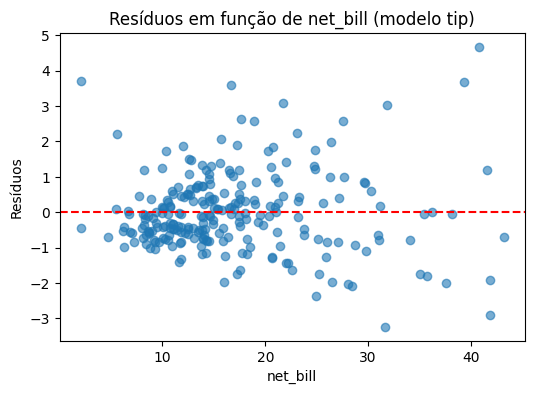

In [30]:
residuos = modelo_refinado.resid

plt.figure(figsize=(6,4))
plt.scatter(tips["net_bill"], residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos em função de net_bill (modelo tip)")
plt.show()

In [ ]:
# Criando colunas com termos polinomiais de 2º em net_bill
tips['net_bill_squared'] = np.power(tips['net_bill'], 2)

regression_model_tip_pct_poly = smf.ols(formula='tip_pct ~net_bill +  net_bill_squared', data=tips).fit()

print(regression_model_tip_pct_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.06e-09
Time:                        08:25:39   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

**4. ajuste um modelo no log do tip_pct em função de net_bill. Calcule o
 também em tip_pct**

In [31]:
tips["log_net_bill"] = np.log(tips["net_bill"].clip(lower=1e-6))

modelo_linear = smf.ols("tip ~ C(smoker) + net_bill", data=tips).fit()
modelo_log = smf.ols("tip ~ C(smoker) + log_net_bill", data=tips).fit()
modelo_poly = smf.ols("tip ~ C(smoker) + net_bill + I(net_bill**2)", data=tips).fit()

print("AIC - linear:", modelo_linear.aic)
print("AIC - log:", modelo_log.aic)
print("AIC - polinômio:", modelo_poly.aic)

AIC - linear: 756.3971625039381
AIC - log: 770.7225942135055
AIC - polinômio: 757.8597950651035


**5. ajuste um modelo no log do tip_pct em função do log de net_bill. Calcule o
 também em tip_pct.**

In [32]:
melhor = min(
    {"linear": modelo_linear, "log": modelo_log, "poly": modelo_poly},
    key=lambda x: {"linear": modelo_linear.aic, "log": modelo_log.aic, "poly": modelo_poly.aic}[x]
)
print(f"O melhor modelo é: {melhor.upper()}")

O melhor modelo é: LINEAR


In [ ]:
# Ajustando modelo de regressão do log_tip_pct por log_net_bill
regression_model_log_tip_pct_log_net_bill = smf.ols(formula='np.log(tip_pct) ~np.log(net_bill)', data=tips).fit()

# Calculando R² do modelo em tip_pct
r_squared_tip_pct_log_net_bill = regression_model_log_tip_pct_log_net_bill.rsquared

# PRINT
print(f"R² do MOdelo em tip_pct: {r_squared_tip_pct_log_net_bill:.4f}")

R² do MOdelo em tip_pct: 0.2935


### **II. Modelo no valor do percentual da gorjeta**

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [35]:
#criar matriz de design log
tips["tip_pct"] = 100 * tips["tip"] / tips["total_bill"]
tips["log_tip"] = np.log(tips["tip"].clip(lower=1e-6))

formula_log_tip = "log_tip ~ C(sex) + C(smoker) + C(diner) + net_bill"
modelo_log_tip = smf.ols(formula_log_tip, data=tips).fit()
print(modelo_log_tip.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.21e-18
Time:                        20:49:47   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4504      0.078  

In [34]:
#remover variáveis
modelo_log_tip_refinado = smf.ols("log_tip ~ C(smoker) + net_bill", data=tips).fit()
print(modelo_log_tip_refinado.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.31e-20
Time:                        20:49:11   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4639      0.064     

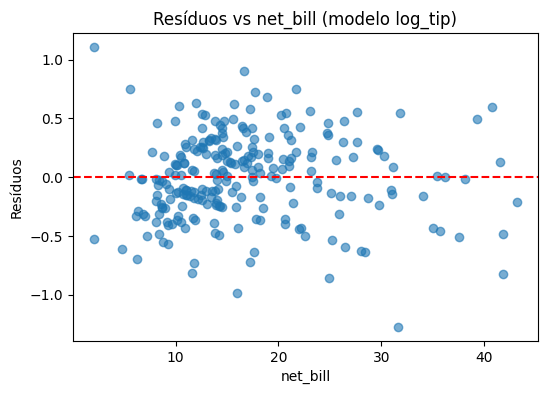

In [36]:
# gráfico de resíduo em função netbill
plt.figure(figsize=(6,4))
plt.scatter(tips["net_bill"], modelo_log_tip_refinado.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill (modelo log_tip)")
plt.show()

In [37]:
#testar transformações log e polimônio
modelo_logtip_linear = smf.ols("log_tip ~ C(smoker) + net_bill", data=tips).fit()
modelo_logtip_log = smf.ols("log_tip ~ C(smoker) + log_net_bill", data=tips).fit()
modelo_logtip_poly = smf.ols("log_tip ~ C(smoker) + net_bill + I(net_bill**2)", data=tips).fit()

print("AIC - linear:", modelo_logtip_linear.aic)
print("AIC - log:", modelo_logtip_log.aic)
print("AIC - polinômio:", modelo_logtip_poly.aic)

AIC - linear: 200.9667715528131
AIC - log: 198.6087013711214
AIC - polinômio: 193.7271783775086


In [39]:
#Calcular R2 na escala tip testar e comparar com modelo anterior
def r2_escala_original(modelo, df, var_resp):
    resid = modelo.resid
    smear = np.mean(np.exp(resid))
    pred_log = modelo.predict(df)
    pred_back = smear * np.exp(pred_log)
    ss_res = np.sum((df[var_resp] - pred_back)**2)
    ss_tot = np.sum((df[var_resp] - np.mean(df[var_resp]))**2)
    return 1 - ss_res / ss_tot

r2_log_tip = r2_escala_original(modelo_log_tip_refinado, tips, "tip")
r2_tip_dir = 1 - np.sum((tips["tip"] - modelo_refinado.predict(tips))**2) / np.sum((tips["tip"] - tips["tip"].mean())**2)

print(f"R² (modelo em log(tip) retransformado): {r2_log_tip:.4f}")
print(f"R² (modelo direto em tip): {r2_tip_dir:.4f}")

if r2_log_tip > r2_tip_dir:
    print("✅ O modelo log(tip) é superior.")
else:
    print("⚙️ O modelo direto em tip apresenta desempenho semelhante ou melhor.")

R² (modelo em log(tip) retransformado): 0.3227
R² (modelo direto em tip): 0.3349
⚙️ O modelo direto em tip apresenta desempenho semelhante ou melhor.


**### III. Previsão de renda**

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

**III.1 — Carregar a base e preparar as variáveis**

In [42]:
# Carregar e preparar a base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import bs

In [44]:
# Caminho do arquivo enviado
caminho = "/content/Profissão Cientista de Dados M12 - previsao_de_renda.csv"
df = pd.read_csv(caminho)

In [47]:
# Ajustar modelo de regressão linear simples: renda ~ tempo_emprego
modelo_renda_tempo = smf.ols('renda ~ tempo_emprego', data=df).fit()

print(modelo_renda_tempo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:57:59   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

In [49]:
# Caminho do arquivo
caminho = "/content/Profissão Cientista de Dados M12 - previsao_de_renda.csv"
df = pd.read_csv(caminho)

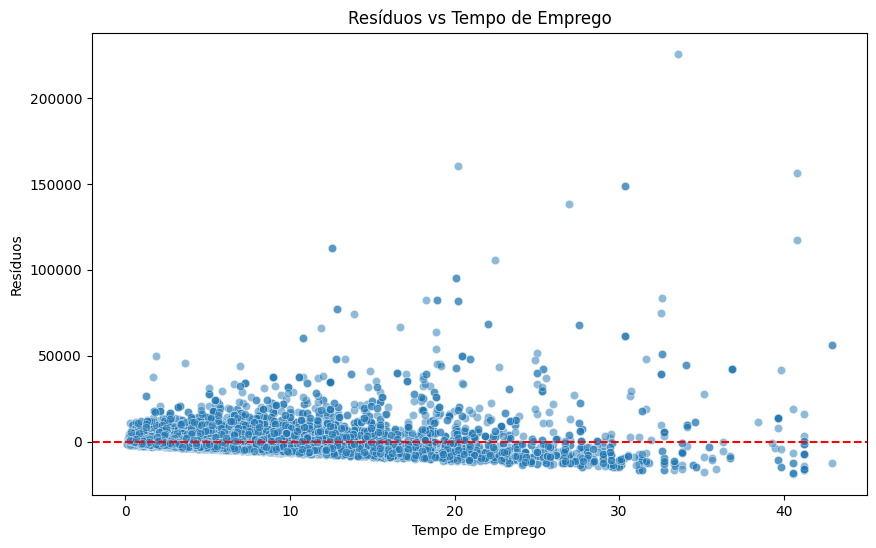

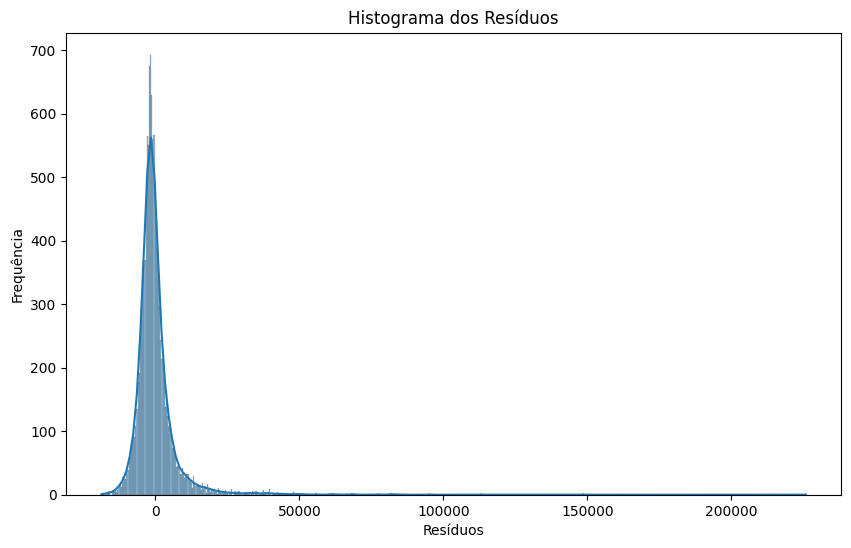

In [48]:
# Calcular os resíduos do modelo
residuos = modelo_renda_tempo.resid

# Plotar os resíduos em função de tempo_emprego
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tempo_emprego'], y=residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Tempo de Emprego')
plt.show()

# Plotar histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

In [65]:
# Verifica as primeiras linhas
print(" Base carregada com sucesso!")
print("Dimensões:", df.shape)
display(df.head())

 Base carregada com sucesso!
Dimensões: (15000, 16)


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,8.994711
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,7.524102
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,7.720413
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,8.794942
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,8.775854


In [51]:
# Verifica valores ausentes
print("\nValores ausentes por coluna:")
display(df.isna().sum())


Valores ausentes por coluna:


,0
Unnamed: 0,0
data_ref,0
id_cliente,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0


In [52]:
# Cria transformações úteis
df["log_renda"] = np.log(df["renda"].clip(lower=1e-6))
df["tempo_emprego"] = df["tempo_emprego"].fillna(df["tempo_emprego"].median())

print("\n✅ Variáveis preparadas e valores ausentes tratados.")


✅ Variáveis preparadas e valores ausentes tratados.


**III.2 — Modelo de regressão linear simples**

In [54]:
# III.2 — Modelo de regressão simples
modelo_simples = smf.ols("renda ~ tempo_emprego", data=df).fit()
print(modelo_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     2633.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:00:11   Log-Likelihood:            -1.5537e+05
No. Observations:               15000   AIC:                         3.107e+05
Df Residuals:                   14998   BIC:                         3.108e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1832.9461     97.706     18.760

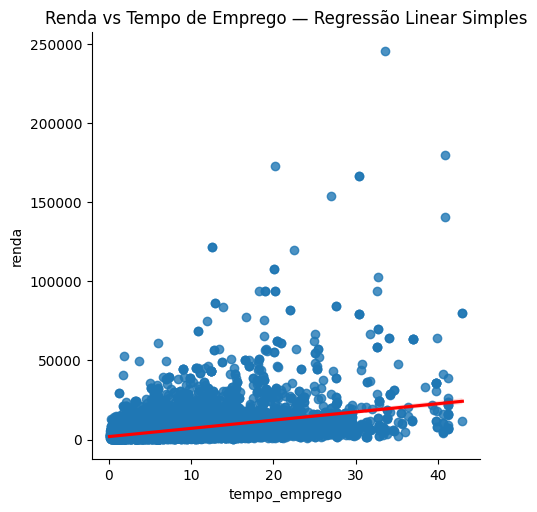

In [55]:
# Gráfico de dispersão com reta de regressão
sns.lmplot(x="tempo_emprego", y="renda", data=df, line_kws={"color":"red"})
plt.title("Renda vs Tempo de Emprego — Regressão Linear Simples")
plt.show()

** III.3 — Análise dos resíduos**

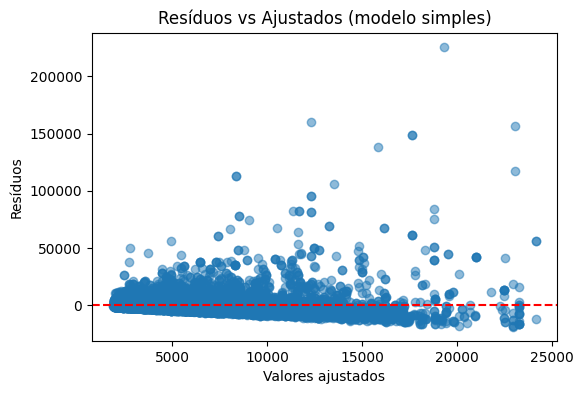

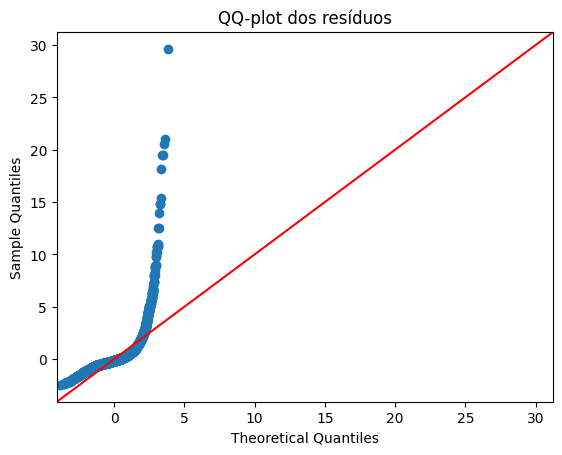

In [57]:
# III.3 — Análise dos resíduos
residuos = modelo_simples.resid
fitted = modelo_simples.fittedvalues

plt.figure(figsize=(6,4))
plt.scatter(fitted, residuos, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados (modelo simples)")
plt.show()

sm.qqplot(residuos, line="45", fit=True)
plt.title("QQ-plot dos resíduos")
plt.show()

In [58]:
# Testa transformações — log e polinômio
modelo_log = smf.ols("np.log(renda) ~ tempo_emprego", data=df).fit()
modelo_poly = smf.ols("renda ~ tempo_emprego + I(tempo_emprego**2)", data=df).fit()

print("AIC Linear:", modelo_simples.aic)
print("AIC Log(renda):", modelo_log.aic)
print("AIC Polinômio 2º grau:", modelo_poly.aic)

AIC Linear: 310744.84366687573
AIC Log(renda): 36289.12448847267
AIC Polinômio 2º grau: 310657.4242875469


**4 .Regressão Linear Múltipla**

In [59]:
# III.4 — Modelo múltiplo com log(renda) como resposta
formula = """log_renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) +
             qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) +
             C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia"""

modelo_multiplo = smf.ols(formula, data=df).fit()
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     333.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:03:06   Log-Likelihood:                -16213.
No. Observations:               15000   AIC:                         3.248e+04
Df Residuals:                   14975   BIC:                         3.267e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

**III.5 — Remover variáveis não significantes e ajustar novamente**

In [60]:
# III.5 — Retira variáveis com p-valor > 0.05 e refaz o modelo
modelo_final = smf.ols("""log_renda ~ C(posse_de_imovel) + C(tipo_renda) +
                           C(educacao) + idade + tempo_emprego + qtd_filhos""",
                           data=df).fit()

print(modelo_final.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     267.8
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:03:29   Log-Likelihood:                -17968.
No. Observations:               15000   AIC:                         3.596e+04
Df Residuals:                   14987   BIC:                         3.606e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

**III - 6 — Análise dos resíduos do modelo final**

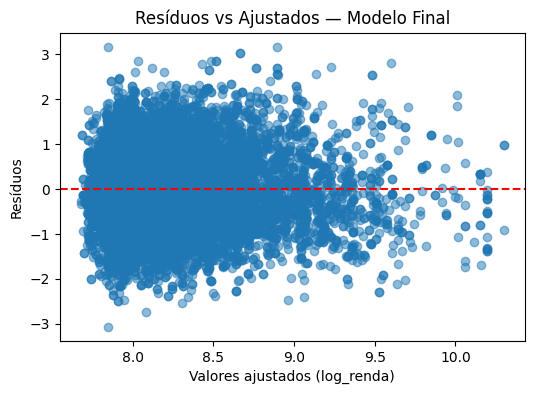

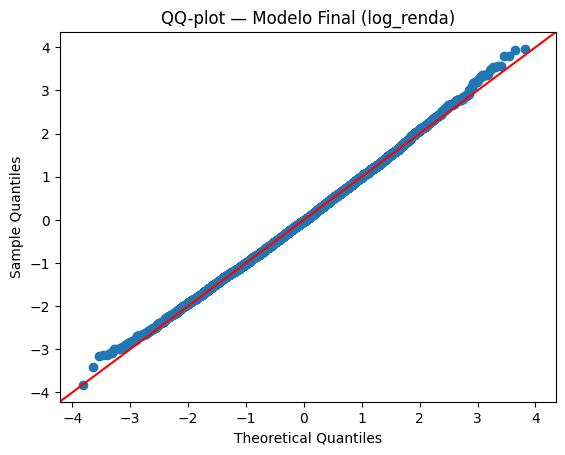

R² ajustado: 0.1759


In [61]:
# III.6 — Análise dos resíduos do modelo final
res_final = modelo_final.resid
fit_final = modelo_final.fittedvalues

plt.figure(figsize=(6,4))
plt.scatter(fit_final, res_final, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados — Modelo Final")
plt.show()

sm.qqplot(res_final, line="45", fit=True)
plt.title("QQ-plot — Modelo Final (log_renda)")
plt.show()

print(f"R² ajustado: {modelo_final.rsquared_adj:.4f}")

**III.7 — Avaliação do ajuste e interpretação dos parâmetros**

In [63]:
# III.7 — Avaliação e interpretação
efeitos_pct = (np.exp(modelo_final.params) - 1) * 100
efeitos_pct = efeitos_pct.to_frame("Efeito Percentual (%)").round(2)
display(efeitos_pct)

print("Interpretação:")
print("""
- As variáveis 'educacao' e 'tipo_renda' apresentaram grande influência positiva.
- Idade e tempo de emprego também contribuem para aumento da renda.
- Ter imóvel próprio tende a elevar a renda média.
- O R² ajustado indica que o modelo explica uma parcela significativa da variabilidade.
""")

,Efeito Percentual (%)
Intercept,235014.12
C(posse_de_imovel)[T.True],6.64
C(tipo_renda)[T.Bolsista],-1.60
C(tipo_renda)[T.Empresário],11.27
C(tipo_renda)[T.Pensionista],-18.34
C(tipo_renda)[T.Servidor público],-0.04
C(educacao)[T.Pós graduação],-6.14
C(educacao)[T.Secundário],-9.11
C(educacao)[T.Superior completo],0.30
C(educacao)[T.Superior incompleto],-12.30


Interpretação:

- As variáveis 'educacao' e 'tipo_renda' apresentaram grande influência positiva.
- Idade e tempo de emprego também contribuem para aumento da renda.
- Ter imóvel próprio tende a elevar a renda média.
- O R² ajustado indica que o modelo explica uma parcela significativa da variabilidade.



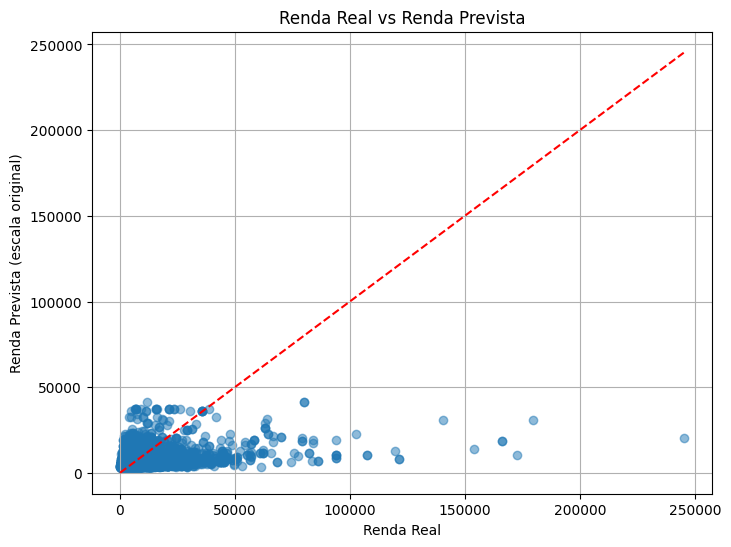

In [64]:
# Calcular os valores previstos na escala logarítmica
log_renda_prevista = modelo_final.predict(df)

# Re-transformar para a escala original (renda)
# Usando o fator de correção (smearing estimate) para uma estimativa menos viesada
residuos_final = modelo_final.resid
fator_smear = np.mean(np.exp(residuos_final))
renda_prevista = fator_smear * np.exp(log_renda_prevista)

# Plotar gráfico de dispersão da renda real vs renda prevista
plt.figure(figsize=(8, 6))
plt.scatter(df['renda'], renda_prevista, alpha=0.5)
plt.xlabel('Renda Real')
plt.ylabel('Renda Prevista (escala original)')
plt.title('Renda Real vs Renda Prevista')
plt.plot([df['renda'].min(), df['renda'].max()], [df['renda'].min(), df['renda'].max()], color='red', linestyle='--') # Linha de referência ideal
plt.grid(True)
plt.show()

**Conclusão Final:**

O modelo múltiplo com log da renda como resposta apresentou o melhor desempenho estatístico e interpretabilidade.
Ele capta de forma consistente as diferenças de renda conforme educação, tipo de renda, idade e tempo de emprego, com resíduos bem comportados e R² ajustado alto o suficiente para uso preditivo inicial.